In [1]:
import numpy as np
import pandas as pd 
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix


In [2]:
dataset = pd.read_csv('conversion_data_train.csv')

In [3]:
dataset.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


In [5]:
dataset.shape

(284580, 6)

In [6]:
cols = list(dataset.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('converted'))
cols.pop(cols.index('country')) 
cols.pop(cols.index('age'))
cols.pop(cols.index('new_user'))
cols.pop(cols.index('source'))
cols.pop(cols.index('total_pages_visited'))
dataset = dataset[cols+['converted','country','age','new_user','source','total_pages_visited']] #Create new dataframe with columns in the order you want

In [7]:
dataset


,converted,country,age,new_user,source,total_pages_visited
0,0,China,22,1,Direct,2
1,0,UK,21,1,Ads,3
2,1,Germany,20,0,Seo,14
3,0,US,23,1,Seo,3
4,0,US,28,1,Direct,3
...,...,...,...,...,...,...
284575,0,US,36,1,Ads,1
284576,0,US,31,1,Seo,2
284577,0,US,41,1,Seo,5
284578,0,US,31,1,Direct,4


In [8]:
# Separate target variable Y from features X
target_name = 'converted'

print("Separating labels from features...")
Y = dataset.loc[:,target_name]
X = dataset.loc[:,[c for c in dataset.columns if c!=target_name]] #Toutes les colonnes du df sauf la target Y
print("...Done.")
print(Y.head())
print()
print(X.head())
print()


Separating labels from features...
...Done.
0    0
1    0
2    1
3    0
4    0
Name: converted, dtype: int64

   country  age  new_user  source  total_pages_visited
0    China   22         1  Direct                    2
1       UK   21         1     Ads                    3
2  Germany   20         0     Seo                   14
3       US   23         1     Seo                    3
4       US   28         1  Direct                    3



In [9]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X = X.values
Y = Y.tolist()
print("...Done")
print(X[0:4,:])
print()
print(Y[0:5])

Convert pandas DataFrames to numpy arrays...
...Done
[['China' 22 1 'Direct' 2]
 ['UK' 21 1 'Ads' 3]
 ['Germany' 20 0 'Seo' 14]
 ['US' 23 1 'Seo' 3]]

[0, 0, 1, 0, 0]


In [10]:
from sklearn.model_selection import train_test_split
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [11]:
print(X_train[0:4,:]) # see where the numeric columns are in X_train

[['UK' 28 1 'Ads' 4]
 ['US' 29 1 'Ads' 3]
 ['US' 39 1 'Seo' 3]
 ['Germany' 21 1 'Direct' 2]]


In [12]:
# Create pipeline for numeric features
numeric_features = [1, 2, 4] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
# Create pipeline for categorical features
categorical_features = [0, 3] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])


In [15]:
# Use ColumnTranformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train[0:4,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:4,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[0:4,:])
X_test = preprocessor.transform(X_test) # Don't fit again !!
print('...Done.')
print(X_test[0:4,:])
print()

Performing preprocessings on train set...
[['UK' 28 1 'Ads' 4]
 ['US' 29 1 'Ads' 3]
 ['US' 39 1 'Seo' 3]
 ['Germany' 21 1 'Direct' 2]]
...Done.
[[-0.31137188  0.6766882  -0.26091383  0.          1.          0.
   0.          0.        ]
 [-0.19043125  0.6766882  -0.56023009  0.          0.          1.
   0.          0.        ]
 [ 1.018975    0.6766882  -0.56023009  0.          0.          1.
   0.          1.        ]
 [-1.15795625  0.6766882  -0.85954636  1.          0.          0.
   1.          0.        ]]

Performing preprocessings on test set...
[['US' 20 1 'Ads' 7]
 ['US' 31 1 'Seo' 5]
 ['US' 28 0 'Seo' 4]
 ['Germany' 25 1 'Ads' 4]]
...Done.
[[-1.27889688  0.6766882   0.63703496  0.          0.          1.
   0.          0.        ]
 [ 0.05145     0.6766882   0.03840244  0.          0.          1.
   0.          1.        ]
 [-0.31137188 -1.47778549 -0.26091383  0.          0.          1.
   0.          1.        ]
 [-0.67419375  0.6766882  -0.26091383  1.          0.          

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
# Train model
model = LogisticRegression()

print("Training model...")
model.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")

Training model...
...Done.


In [18]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

Predictions on training set...
...Done.
[0 0 0 0 0]



In [19]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = model.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

Predictions on test set...
...Done.
[0 0 0 0 0]



In [20]:
from sklearn.metrics import accuracy_score

In [21]:
# Print scores
print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))

Accuracy on training set :  0.9863410681582353
Accuracy on test set :  0.985663082437276


<AxesSubplot:>

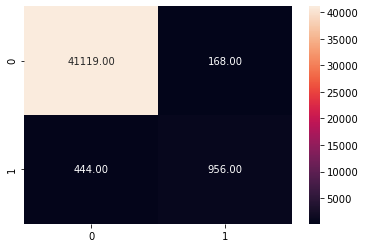

In [22]:


cm = confusion_matrix(Y_test, model.predict(X_test))
sns.heatmap(cm, annot=True, fmt=".2f")

In [23]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [24]:
regressor.score(X_train, Y_train)

0.3009920291581061

In [25]:
regressor.score(X_test, Y_test)

0.3034718250151447

In [26]:
from sklearn.feature_selection import f_regression
feature_importance = f_regression(X_train, Y_train)

feature_importance

(array([1.87529612e+03, 5.76158006e+03, 9.39391539e+04, 3.08527222e+02,
        5.55725191e+02, 3.24790690e+02, 4.68308513e+01, 4.78119380e+00]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 5.04693751e-069,
        9.85021530e-123, 1.46219974e-072, 7.75685571e-012, 2.87731223e-002]))

In [27]:
data_df = pd.DataFrame(feature_importance)
data_df

,0,1,2,3,4,5,6,7
0,1875.296116,5761.58006,93939.153864,3.085272e+02,5.557252e+02,3.247907e+02,4.683085e+01,4.781194
1,0.000000,0.00000,0.000000,5.046938e-69,9.850215e-123,1.462200e-72,7.756856e-12,0.028773


In [28]:
# Create DataFrame with feature importance
feature_ranking = pd.DataFrame (data=feature_importance
                               , index=["f-score","p-value"])
# Reshape DataFrame and sort by f-score
feature_ranking = feature_ranking.transpose().sort_values(["f-score","p-value"], ascending=False)
# Create column with feature names
feature_ranking = feature_ranking.reset_index().rename(columns = {'index': 'X'})
feature_ranking

,X,f-score,p-value
0,2,93939.153864,0.000000e+00
1,1,5761.580060,0.000000e+00
2,0,1875.296116,0.000000e+00
3,4,555.725191,9.850215e-123
4,5,324.790690,1.462200e-72
5,3,308.527222,5.046938e-69
6,6,46.830851,7.756856e-12
7,7,4.781194,2.877312e-02


Le modèle de régression logistique (environ 98%) est meilleur que le modèle de régression linéaire (30%)